# Trabajo práctico 3

Para la imagen suministrada eyes (por ninguna razón en especial, con heterocromía), implementar un algoritmo que 
1. Encuentre la posición de los iris en cada par de ojos y mida su distancia en píxeles
2. Encuentre la posición de las pupilas en cada par de ojos y mida su distancia en píxeles

In [4]:
# Importar librerías
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


Tamaño imagen: (600, 600, 3) pix


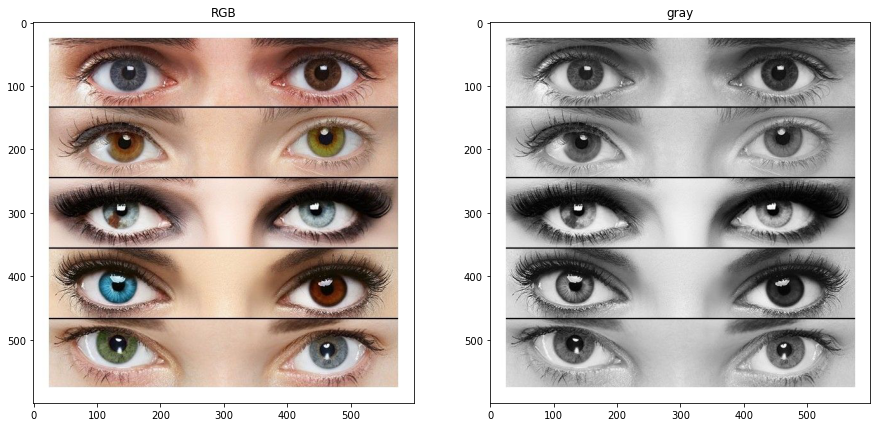

In [5]:
img = cv.imread('eyes.jpg')
print('\nTamaño imagen: {} pix'.format(img.shape))
img_rgb =  cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.subplots(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('RGB')
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.title('gray')
plt.imshow(img_gray,cmap='gray')
plt.show()

In [6]:
blur_gray = cv.medianBlur(img_gray,5)

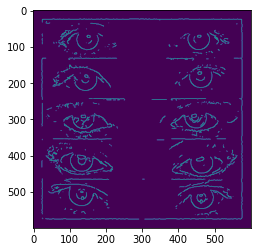

In [7]:
edges = cv.Canny(blur_gray,150,160,apertureSize = 3)
#plt.figure(figsize=(20,20))
plt.imshow(edges)
plt.show()

In [8]:
blur_bgr = cv.medianBlur(img,5)
blur_rgb = cv.cvtColor(blur_bgr,cv.COLOR_BGR2RGB)

### Ejercicio 1

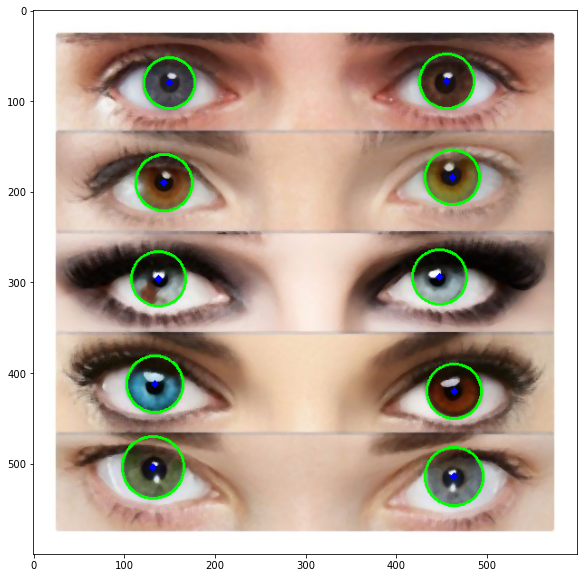

In [194]:
img_out2 = blur_rgb.copy()
circles2 = cv.HoughCircles(blur_gray,cv.HOUGH_GRADIENT,1,minDist=90,param1=130,param2=17,minRadius=26, maxRadius=35)

circles2 = np.uint16(np.around(circles2))
for i in circles2[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out2,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out2,(i[0],i[1]),2,(0,0,255),3)
plt.subplots(figsize=(15,10))
plt.imshow(img_out2)
plt.show()

In [252]:
distancias_iris = []
circles2_ordenados = circles2[:,circles2[:,:,1].argsort(),:]
for i in range(int((circles2_ordenados.shape[2]/2))):
    distancias_iris.append(abs(int(circles2_ordenados[0,0,2*i+1][0])-int(circles2_ordenados[0,0,2*i][0])))

In [253]:
distancias_iris

[306, 318, 310, 330, 332]

### Ejercicio 2

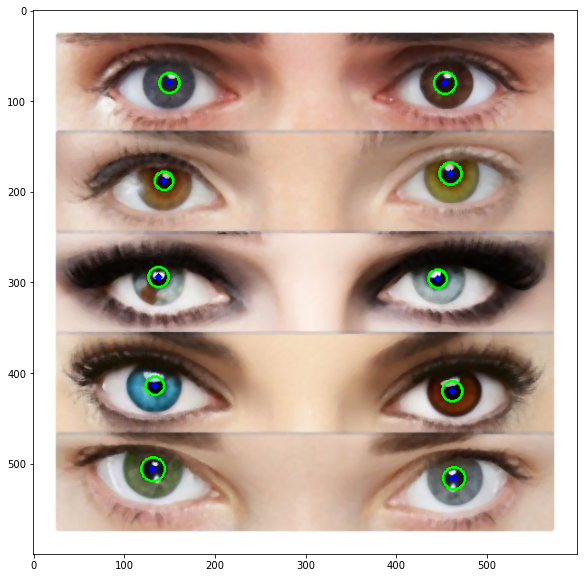

In [162]:
img_out = blur_rgb.copy()
circles = cv.HoughCircles(blur_gray,cv.HOUGH_GRADIENT,1,minDist=90,param1=130,param2=16,minRadius=9, maxRadius=15)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(i[0],i[1]),2,(0,0,255),3)
plt.subplots(figsize=(15,10))
plt.imshow(img_out)
plt.show()

In [254]:
distancias_pupilas = []
circles_ordenados = circles[:,circles[:,:,1].argsort(),:]
for i in range(int((circles_ordenados.shape[2]/2))):
    distancias_pupilas.append(abs(int(circles_ordenados[0,0,2*i+1][0])-int(circles_ordenados[0,0,2*i][0])))

distancias_pupilas

[304, 316, 308, 328, 332]